[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

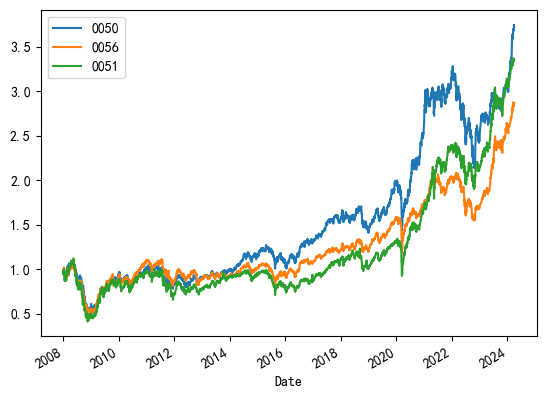

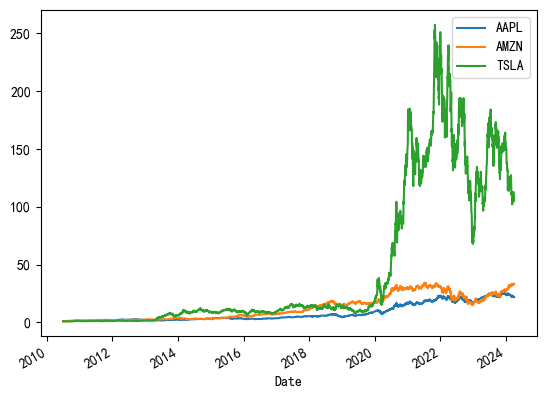

In [3]:
"""
多商品報酬曲線比較
"""

# 載入函數工具檔
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
# 以下為自訂函數「getDataYF」「getDataFM」使用
import os
import yfinance as yf

# 配置 matplotlib 的字體為支援中文的字體
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 例如使用微軟雅黑
plt.rcParams["axes.unicode_minus"] = False  # 正確顯示負號


def getDataYF(prod):
    # 備份文件的資料夾
    folder_name = "data"
    # 檢查資料夾是否存在
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # 1. 定義備份檔案名稱
    bakfile = os.path.join(folder_name, f"yf_{prod}.csv")
    # 2. 檢視是否有歷史資料(本地端)
    if os.path.exists(bakfile):
        yfdata = pd.read_csv(bakfile)
        yfdata["Date"] = pd.to_datetime(yfdata["Date"], format="%Y-%m-%d")
        yfdata.set_index("Date", inplace=True)
    else:
        # 最大範圍
        yfdata = yf.download(prod, period="max")
        # 也可以指定起迄日期
        # yfdata = yf.download(str(prod), start='2020-01-01', end='2024-03-31')
        yfdata.columns = [i.lower() for i in yfdata.columns]
        # 上網下載後 存到本地端
        yfdata.to_csv(bakfile)
    return yfdata


def getDataFM(prod):
    # 備份文件的資料夾
    folder_name = "data"
    # 檢查資料夾是否存在
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # 1. 定義備份檔案名稱
    bakfile = os.path.join(folder_name, f"{prod}.csv")
    # 2. 檢視是否有歷史資料(本地端)
    if os.path.exists(bakfile):
        yfdata = pd.read_csv(bakfile)
        yfdata["Date"] = pd.to_datetime(yfdata["Date"], format="%Y-%m-%d")
        yfdata.set_index("Date", inplace=True)
    else:
        yfdata = yf.download(f"{prod}.TW", period="max", progress=False)
        if yfdata.shape[0] == 0:
            yfdata = yf.download(f"{prod}.TWO", period="max", progress=False)
        yfdata.columns = [i.lower() for i in yfdata.columns]
        # 上網下載後 存到本地端
        yfdata.to_csv(bakfile)
    return yfdata

# 取得多商品歷史報酬率
def getMultipleReturn(getDataFunction, symbols, price_column):
    # 透過迴圈將不同商品報酬率計算出來
    datas = []
    for symbol in symbols:
        data = getDataFunction(symbol)
        # 分別計算報酬率
        returns = data[price_column].pct_change()
        cap_ret = 1 + returns
        cap_ret.name = symbol
        datas.append(cap_ret)
    # 將多商品報酬率整合
    all_ret = pd.concat(datas, axis=1)

    return all_ret

# 取得台股多商品資料 並繪製多商品報酬曲線圖
symbols = ["0050", "0056", "0051"]
all_price = getMultipleReturn(getDataFM, symbols, "adj close")
all_price.dropna().cumprod().plot()

# 取得美股多商品資料 並繪製多商品報酬曲線圖
symbols = ["AAPL", "AMZN", "TSLA"]
all_price = getMultipleReturn(getDataYF, symbols, "adj close")
all_price.dropna().cumprod().plot()
